In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load your data
df = pd.read_csv("FilteredData_MorrisLecar_I0_95.csv")

# Select only the relevant columns you want to show in the plot
cols = ['Amp', 'L', 'L1', 'p1', 'L2', 'p2', 'tnextmax', 'l3max', 'p3max']

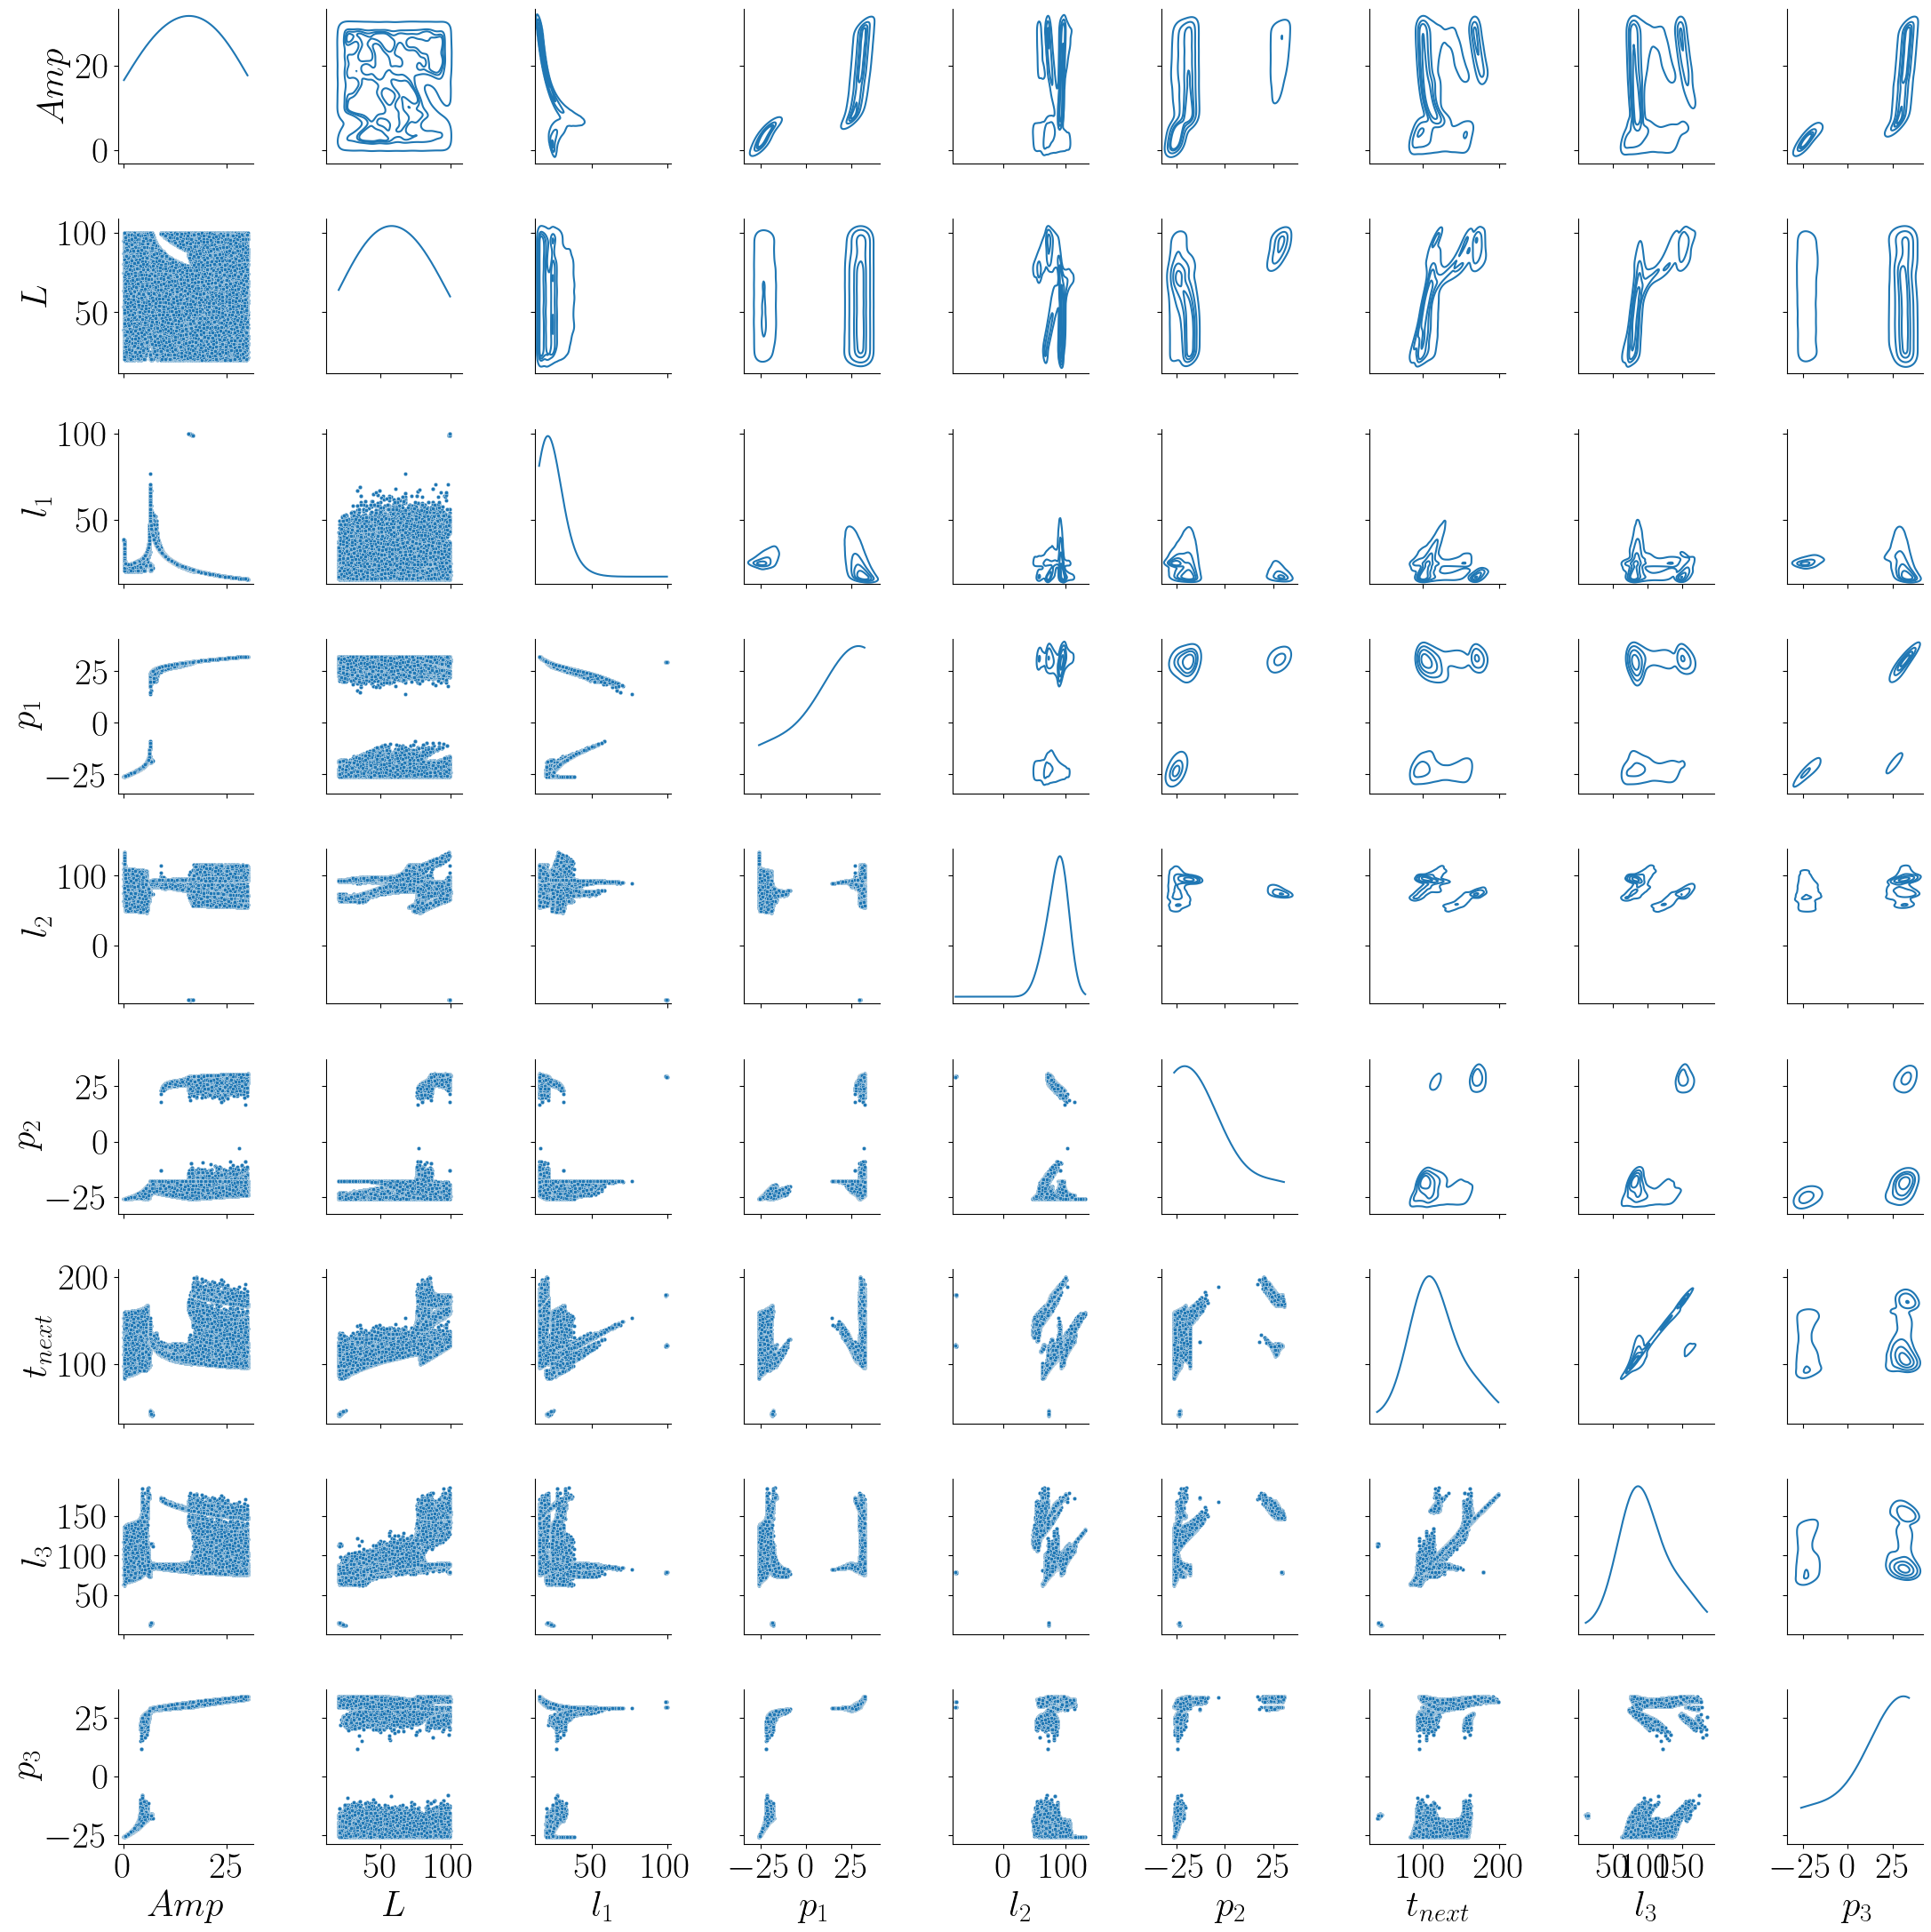

In [5]:
import numpy as np
new_labels = [
    r'$Amp$',
    r'$L$',
    r'$l_1$',
    r'$p_1$',
    r'$l_2$',
    r'$p_2$',
    r'$t_{next}$',
    r'$l_3$',
    r'$p_3$'
]

# LaTeX-style fonts & bigger size
plt.rcParams.update({
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': ['Computer Modern Roman'],
    'axes.formatter.use_mathtext': False,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 32,           # <- set global font size
    'axes.titlesize': 32,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 30
})
single_color = "#1f77b4"  # Seaborn's default blue

# Create PairGrid
g1 = sns.PairGrid(df[cols])

# Lower: scatter
g1.map_lower(sns.scatterplot, s=10, color=single_color)

# Diagonal: univariate KDE
# g1.map_diag(sns.kdeplot, fill=False, color=single_color,bw_adjust=1)
def normed_kde(x, color, **kwargs):
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(x, bw_method=kwargs.get('bw_adjust', 1))
    xx = np.linspace(np.min(x), np.max(x), 200)
    yy = kde(xx)
    yy /= yy.max()   # normalize to 1
    plt.plot(xx, yy, color=color, **kwargs)

g1.map_diag(normed_kde, color=single_color)



# Upper: 2D KDE
g1.map_upper(sns.kdeplot, fill=False, thresh=0.05, levels=5, color=single_color)

# Replace outer x and y labels with LaTeX
for i, row in enumerate(cols):
    for j, col in enumerate(cols):
        ax = g1.axes[i, j]
        if i == len(cols) - 1:
            ax.set_xlabel(new_labels[j])
        if j == 0:
            ax.set_ylabel(new_labels[i])
# Rescale diagonal KDE to peak at 1 (like pairplot)
for i in range(len(cols)):
    ax = g1.axes[i, i]
    lines = ax.get_lines()
    if lines:
        ymax = max(line.get_ydata().max() for line in lines)
        ax.set_ylim(0, ymax * 1.05)
# Adjust layout and save
plt.tight_layout()
g1.savefig("kde_scatter_I95_1.png", bbox_inches="tight")
plt.show()